# Explore the use of sea level from satellite altimetry for the budget

In [1]:
import sys
sys.path.append('../code')

import pandas as pd
import xarray as xr

import SeaLevelContrib as slc

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

## Test the function that read satellite altimetry values for neirest points of tide gauge

In [2]:
tg_id = [20, 22, 23, 24, 25, 32]

In [3]:
altimetry_df = slc.altimetry_obs(tg_id, 0)

<AxesSubplot: >

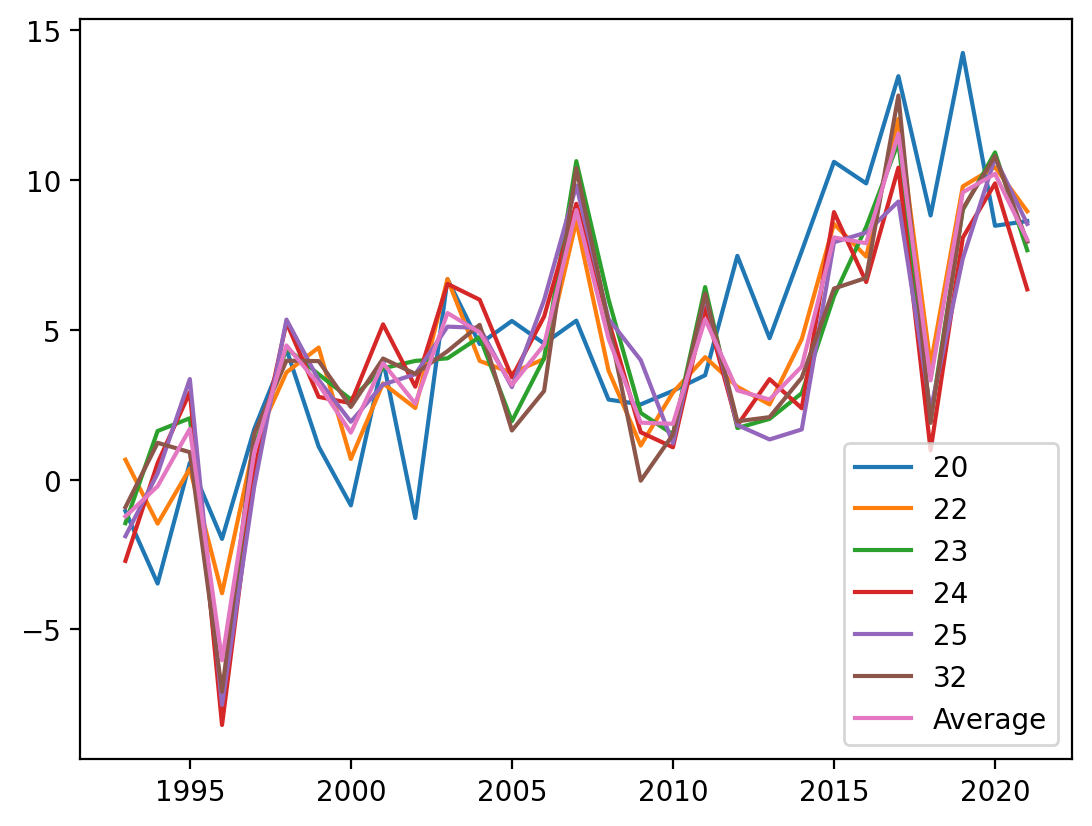

In [4]:
altimetry_df.plot()

## Check the difference for neighbour points and regions

In [5]:
duacs_dir = '~/Data/duacs_cmems/'
file_name = f'{duacs_dir}cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1M-m_*.nc'
duacs_ds = xr.open_mfdataset(file_name).load()
duacs_ds = rotate_longitude(duacs_ds, 'longitude')
duacs_ds['sla'] = duacs_ds.sla*100 # Convert from meter to cm
duacs_y_ds = duacs_ds.groupby('time.year').mean()

In [12]:
geo_coord = slc.tg_lat_lon(tg_id[0])

In [30]:
point = duacs_y_ds.sel(latitude=geo_coord[0], longitude=geo_coord[1], method="nearest")
point2 = duacs_y_ds.sel(latitude=slice(geo_coord[0]-2, geo_coord[0]+2), 
                        longitude=slice(geo_coord[1]-2, geo_coord[1]+2),
                       ).mean(dim=["latitude","longitude"])

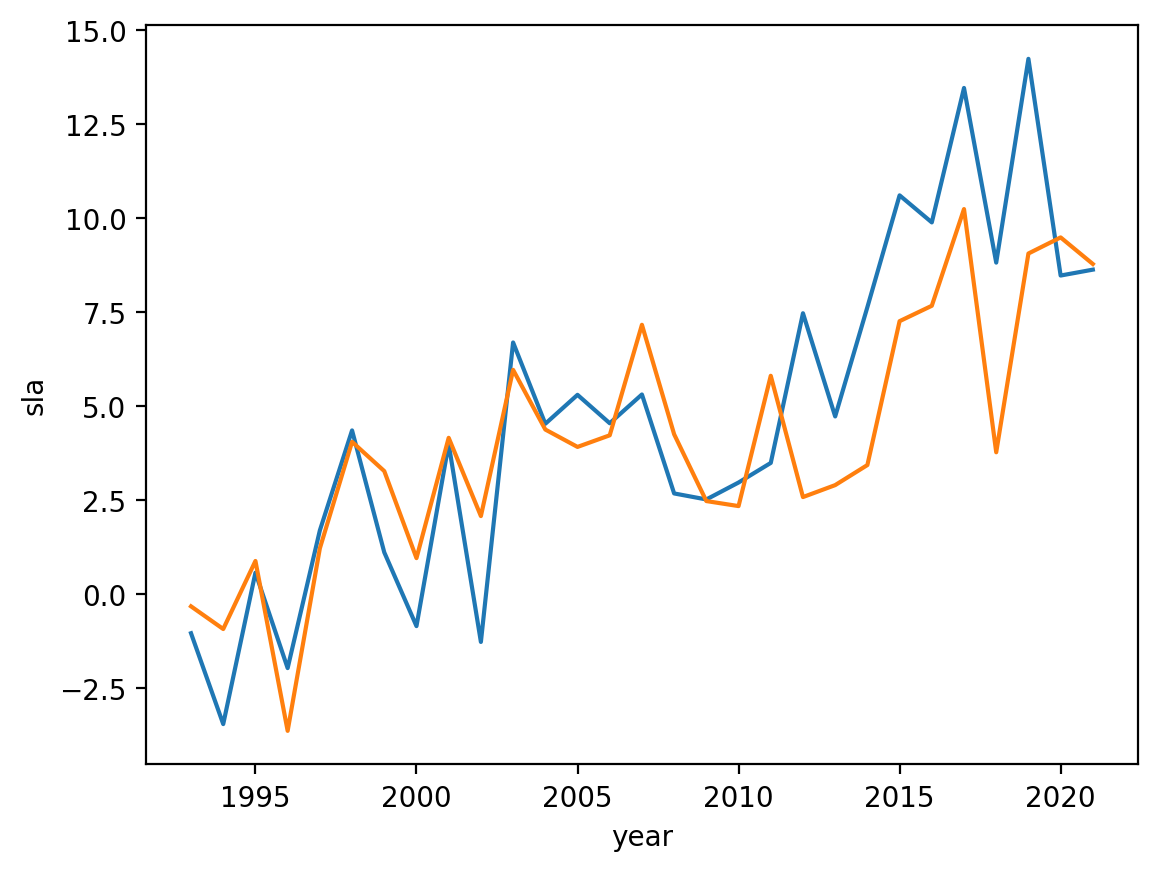

In [38]:
point.sla.plot()
point2.sla.plot()

In [39]:
reg = duacs_y_ds.sel(latitude=slice(geo_coord[0]-2, geo_coord[0]+2), 
                        longitude=slice(geo_coord[1]-2, geo_coord[1]+2),
                       )

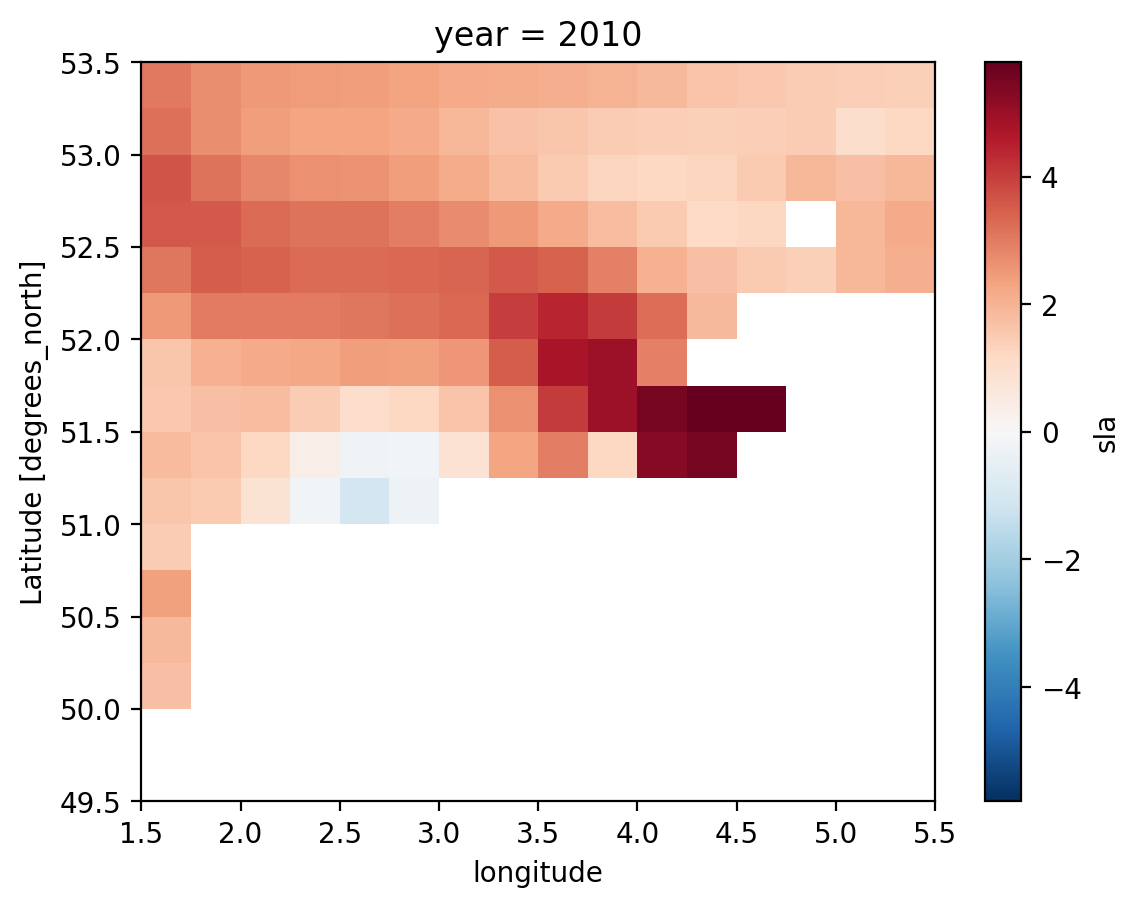

In [40]:
reg.sla.sel(year=2010).plot()